In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
base_path = '/content/drive/MyDrive/Colab_Session-main/Multi-Layer_perceptron/' # Set the folder path where the data files are located
train_data_path = base_path + 'molding_train.csv' # Set the file path for train_data.csv
test_data_path = base_path + 'molding_test.csv' # Set the file path for test_data.csv

In [18]:
train = pd.read_csv(train_data_path) # Change the input columns according to your data
train = np.array(train) # Change the x_train data as array by numpy

x_train = train[:,:-1]
y_train = train[:,-1]

print(x_train.shape)
print(y_train.shape)

(880, 24)
(880,)


In [19]:
test = pd.read_csv(test_data_path) # Change the input columns according to your data
test = np.array(test) # Change the x_train data as array by numpy

x_test = test[:,:-1]
y_test = test[:,-1]

print(x_test.shape)
print(y_test.shape)

(220, 24)
(220,)


In [20]:
sc=StandardScaler()

scaler = sc.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [31]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(10,2),
                        batch_size = 32,
                        max_iter = 30,
                        activation = 'relu',
                        solver = 'adam',
                        verbose = 1)

In [32]:
history = mlp_clf.fit(x_train_scaled, y_train)

Iteration 1, loss = 0.74483863
Iteration 2, loss = 0.72189323
Iteration 3, loss = 0.69043501
Iteration 4, loss = 0.64560286
Iteration 5, loss = 0.58422778
Iteration 6, loss = 0.51580971
Iteration 7, loss = 0.44995235
Iteration 8, loss = 0.39274020
Iteration 9, loss = 0.34914370
Iteration 10, loss = 0.31407747
Iteration 11, loss = 0.28643335
Iteration 12, loss = 0.26362959
Iteration 13, loss = 0.24660183
Iteration 14, loss = 0.23314577
Iteration 15, loss = 0.22193580
Iteration 16, loss = 0.21290733
Iteration 17, loss = 0.20558919
Iteration 18, loss = 0.19843134
Iteration 19, loss = 0.19148141
Iteration 20, loss = 0.18525525
Iteration 21, loss = 0.17875278
Iteration 22, loss = 0.17026813
Iteration 23, loss = 0.16308031
Iteration 24, loss = 0.15643476
Iteration 25, loss = 0.15068511
Iteration 26, loss = 0.14593299
Iteration 27, loss = 0.14110708
Iteration 28, loss = 0.13642005
Iteration 29, loss = 0.13224683
Iteration 30, loss = 0.12809008


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


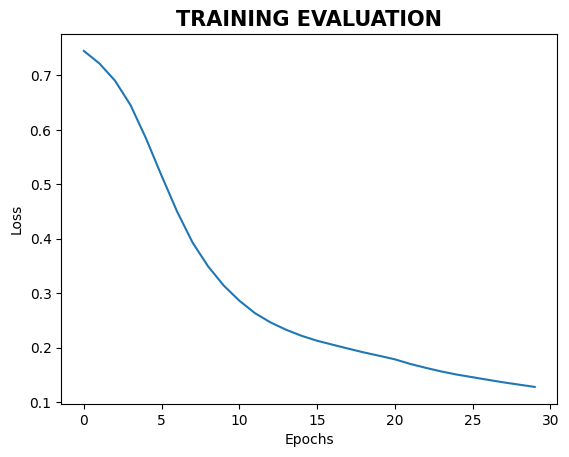

In [33]:
loss_values = mlp_clf.loss_curve_
plt.plot(loss_values)

plt.title("TRAINING EVALUATION", fontweight = "bold", fontsize = 15)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [34]:
y_pred = mlp_clf.predict(x_test_scaled)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.98


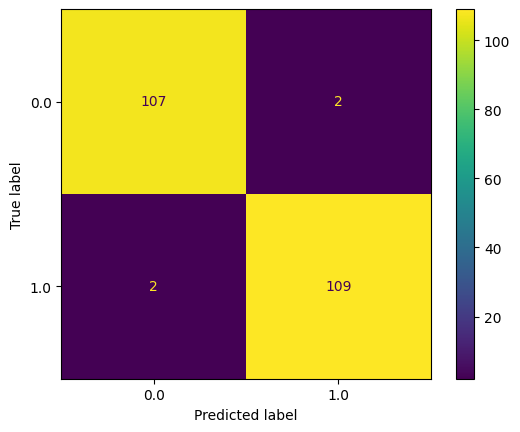

In [35]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mlp_clf.classes_)
disp.plot()
plt.show()